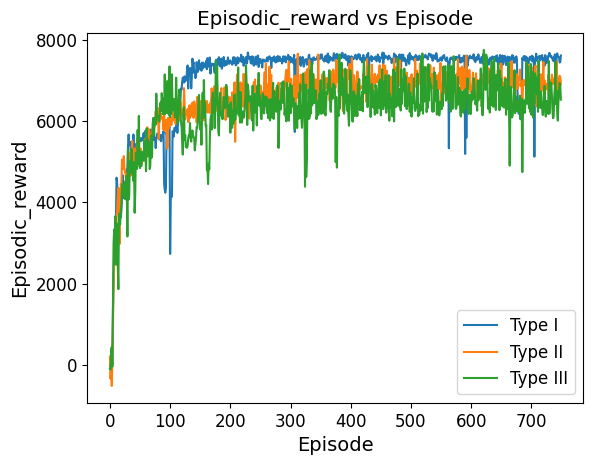

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

# Define the smoothing function
def smooth(y, pts):
    box = np.ones(pts) / pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# Set the font properties
plt.rc('font', family='Times New Roman', size=12)



# Load data from .mat files
episode_reward_Type_I = loadmat('Results_TypeI_episodic_reward.mat')
episode_reward_Type_II = loadmat('Results_TypeII_episodic_reward.mat')
episode_reward_Type_III = loadmat('Results_TypeIII_episodic_reward.mat')

# Retrieve data for the number of episodes and connected users
num_episode_1 = episode_reward_Type_I['num_episode'].squeeze()
episode_reward_1 = episode_reward_Type_I['episodic_reward'].squeeze()
num_episode_2 = episode_reward_Type_II['num_episode'].squeeze()
episode_reward_2 = episode_reward_Type_II['episodic_reward'].squeeze()
num_episode_3 = episode_reward_Type_III['num_episode'].squeeze()
episode_reward_3 = episode_reward_Type_III['episodic_reward'].squeeze()

# Apply smoothing to the connected user data
pts = 1  # Smoothing over 1 point does not change the data
episode_reward_1_smooth = smooth(episode_reward_1, pts)
episode_reward_2_smooth = smooth(episode_reward_2, pts)
episode_reward_3_smooth = smooth(episode_reward_3, pts)

# Create the plot
plt.figure()
plt.plot(num_episode_1[:750], episode_reward_1_smooth[:750], label='Type I')
plt.plot(num_episode_2[:750], episode_reward_2_smooth[:750], label='Type II')
plt.plot(num_episode_3[:750], episode_reward_3_smooth[:750], label='Type III')

plt.legend(loc="lower right")
plt.xlabel("Episode", fontsize = 14, family = 'Times New Roman')
plt.ylabel("Episodic_reward", fontsize = 14, family = 'Times New Roman')
plt.title("Episodic_reward vs Episode")
plt.show()



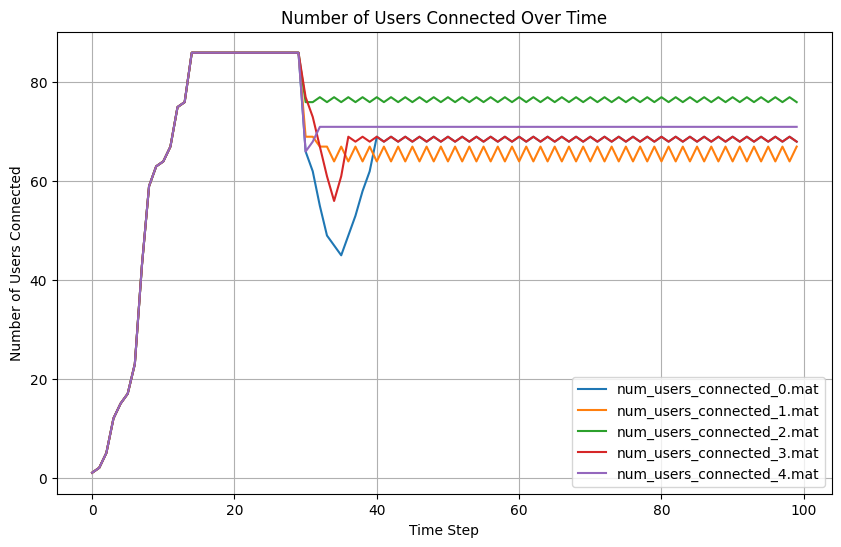

In [1]:
import matplotlib.pyplot as plt
from scipy.io import loadmat

# List of .mat file names
file_names = ['num_users_connected_0.mat', 'num_users_connected_1.mat',
              'num_users_connected_2.mat', 'num_users_connected_3.mat',
              'num_users_connected_4.mat']

# Plotting each file
plt.figure(figsize=(10, 6))

for file_name in file_names:
    # Load .mat file
    data = loadmat(file_name)

    # Extract data
    time_step = data['time_step'].flatten()
    num_users_connected = data['num_users_connected'].flatten()

    # Plot data
    plt.plot(time_step, num_users_connected, label=file_name)

# Customize the plot
plt.xlabel('Time Step')
plt.ylabel('Number of Users Connected')
plt.title('Number of Users Connected Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
